Importing Libraries

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

Load CIFAR-100 dataset

In [18]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

Normalize pixel values to [0, 1]

In [19]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Define CNN architecture

In [20]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(100, activation='softmax')  # 100 classes in CIFAR-100
])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [27]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6745 - loss: 1.1362 - val_accuracy: 0.3571 - val_loss: 3.1560
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7136 - loss: 0.9880 - val_accuracy: 0.3491 - val_loss: 3.5222
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7438 - loss: 0.8709 - val_accuracy: 0.3444 - val_loss: 3.7198
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7700 - loss: 0.7720 - val_accuracy: 0.3395 - val_loss: 3.9718
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7998 - loss: 0.6683 - val_accuracy: 0.3384 - val_loss: 4.2745
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8146 - loss: 0.5984 - val_accuracy: 0.3321 - val_loss: 4.5930
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8391 - loss: 0.5199 - val_accuracy: 0.3277 - val_loss: 4.7594
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8532 -

Evaluate the model

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3307 - loss: 5.7220
Test accuracy: 0.3296


Training History Visualization

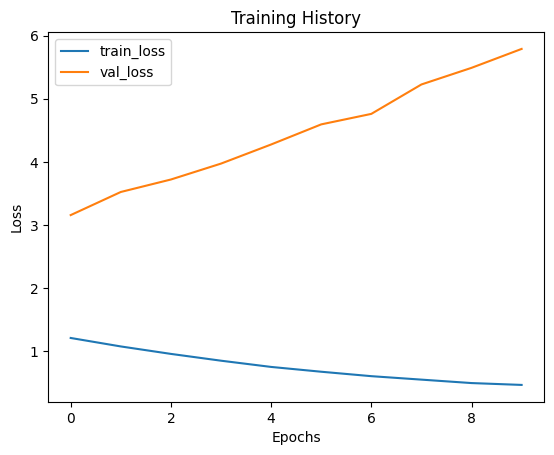

In [34]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Classification Report

In [33]:
# Generate predicted probabilities for each class
predicted_probs = model.predict(test_images)

# Get the class with the highest probability for each sample
predicted_classes = predicted_probs.argmax(axis=1)

# Assuming class labels are numeric (from 0 to 99)
class_labels = [str(i) for i in range(100)]

# Generate classification report
report = classification_report(test_labels, predicted_classes, target_names=class_labels)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.57      0.60      0.59       100
           1       0.45      0.39      0.42       100
           2       0.29      0.30      0.30       100
           3       0.15      0.16      0.16       100
           4       0.16      0.17      0.17       100
           5       0.29      0.21      0.24       100
           6       0.35      0.38      0.37       100
           7       0.37      0.28      0.32       100
           8       0.46      0.32      0.38       100
           9       0.50      0.39      0.44       100
          10       0.23      0.20      0.22       100
          11       0.24      0.18      0.20       100
          12       0.40      0.34      0.37       100
          13       0.38      0.24      0.29       100
          14       0.25      0.19      0.22       100
          15       0.21      0.19      0.20       100
          16       0.38      0.38      0